In [2]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

## Brief Description of the dataset and summary of it's attributes

Water quality measurements and boolean for potable or not

# Initial Data Exploration
- read into a pandas dataframe
- plot the distributions for each variable to determine whether they need to be transformed
- plot each variable against each other to detect collinearity

In [3]:
# read data into a pandas dataframe
water_data = pd.read_csv('water_potability.csv')
water_data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
print('there are', water_data.shape[0], 'observations')
print('there are', water_data.shape[1], 'features for each')

there are 3276 observations
there are 10 features for each


In [5]:
print('Datatypes for each column:')
water_data.dtypes

Datatypes for each column:


ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

## Calculate statistics

In [6]:
# calculate statistics for the dataset
water_stats = water_data.describe()

# add the range
water_stats.loc['range']=water_stats.loc['max']-water_stats.loc['min']
water_stats

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   
range    14.000000   275.692000  60906.253396    12.775000   352.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000  
range    571.858866       26.100000       123.262000     5.289000     1.000000

In [7]:
# how many samples are potable/unpotable?
water_data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [8]:
# calculate mean and median of each variable, separated by potability
water_data.groupby('Potability').agg(['mean', 'median'])

ph              Hardness                    Solids  \
                mean    median        mean      median          mean   
Potability                                                             
0           7.085378  7.035456  196.733292  197.123423  21777.490788   
1           7.073783  7.036752  195.800744  196.632907  22383.991018   

                         Chloramines              Sulfate              \
                  median        mean    median       mean      median   
Potability                                                              
0           20809.618280    7.092175  7.090334  334.56429  333.389426   
1           21199.386614    7.169338  7.215163  332.56699  331.838167   

           Conductivity             Organic_carbon            Trihalomethanes  \
                   mean      median           mean     median            mean   
Potability                                                                      
0            426.730454  422.229331      14.364335  14.293508       66.303555   
1            425.383800  420.712729      14.160893  14.162809       66.539684   

                      Turbidity            
               median      mean    median  
Potability                                 
0           66.542198  3.965800  3.948076  
1           66.678214  3.968328  3.958576

## Visualize the data

Text(0.5, 1.0, 'Conductivitiy')

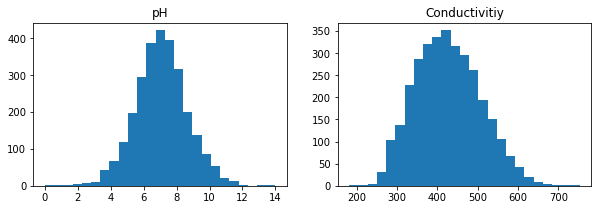

In [9]:
# Example of histogram subplots

f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax.hist(water_data.ph, bins=25)
ax.set_title('pH')

ax2 = f.add_subplot(122)
ax2.hist(water_data.Conductivity, bins=25)
ax2.set_title('Conductivitiy')

### Use seaborn pairplot 
examine distributions for each variable to detect skew <br>
examine scatte plots to detect collinearity

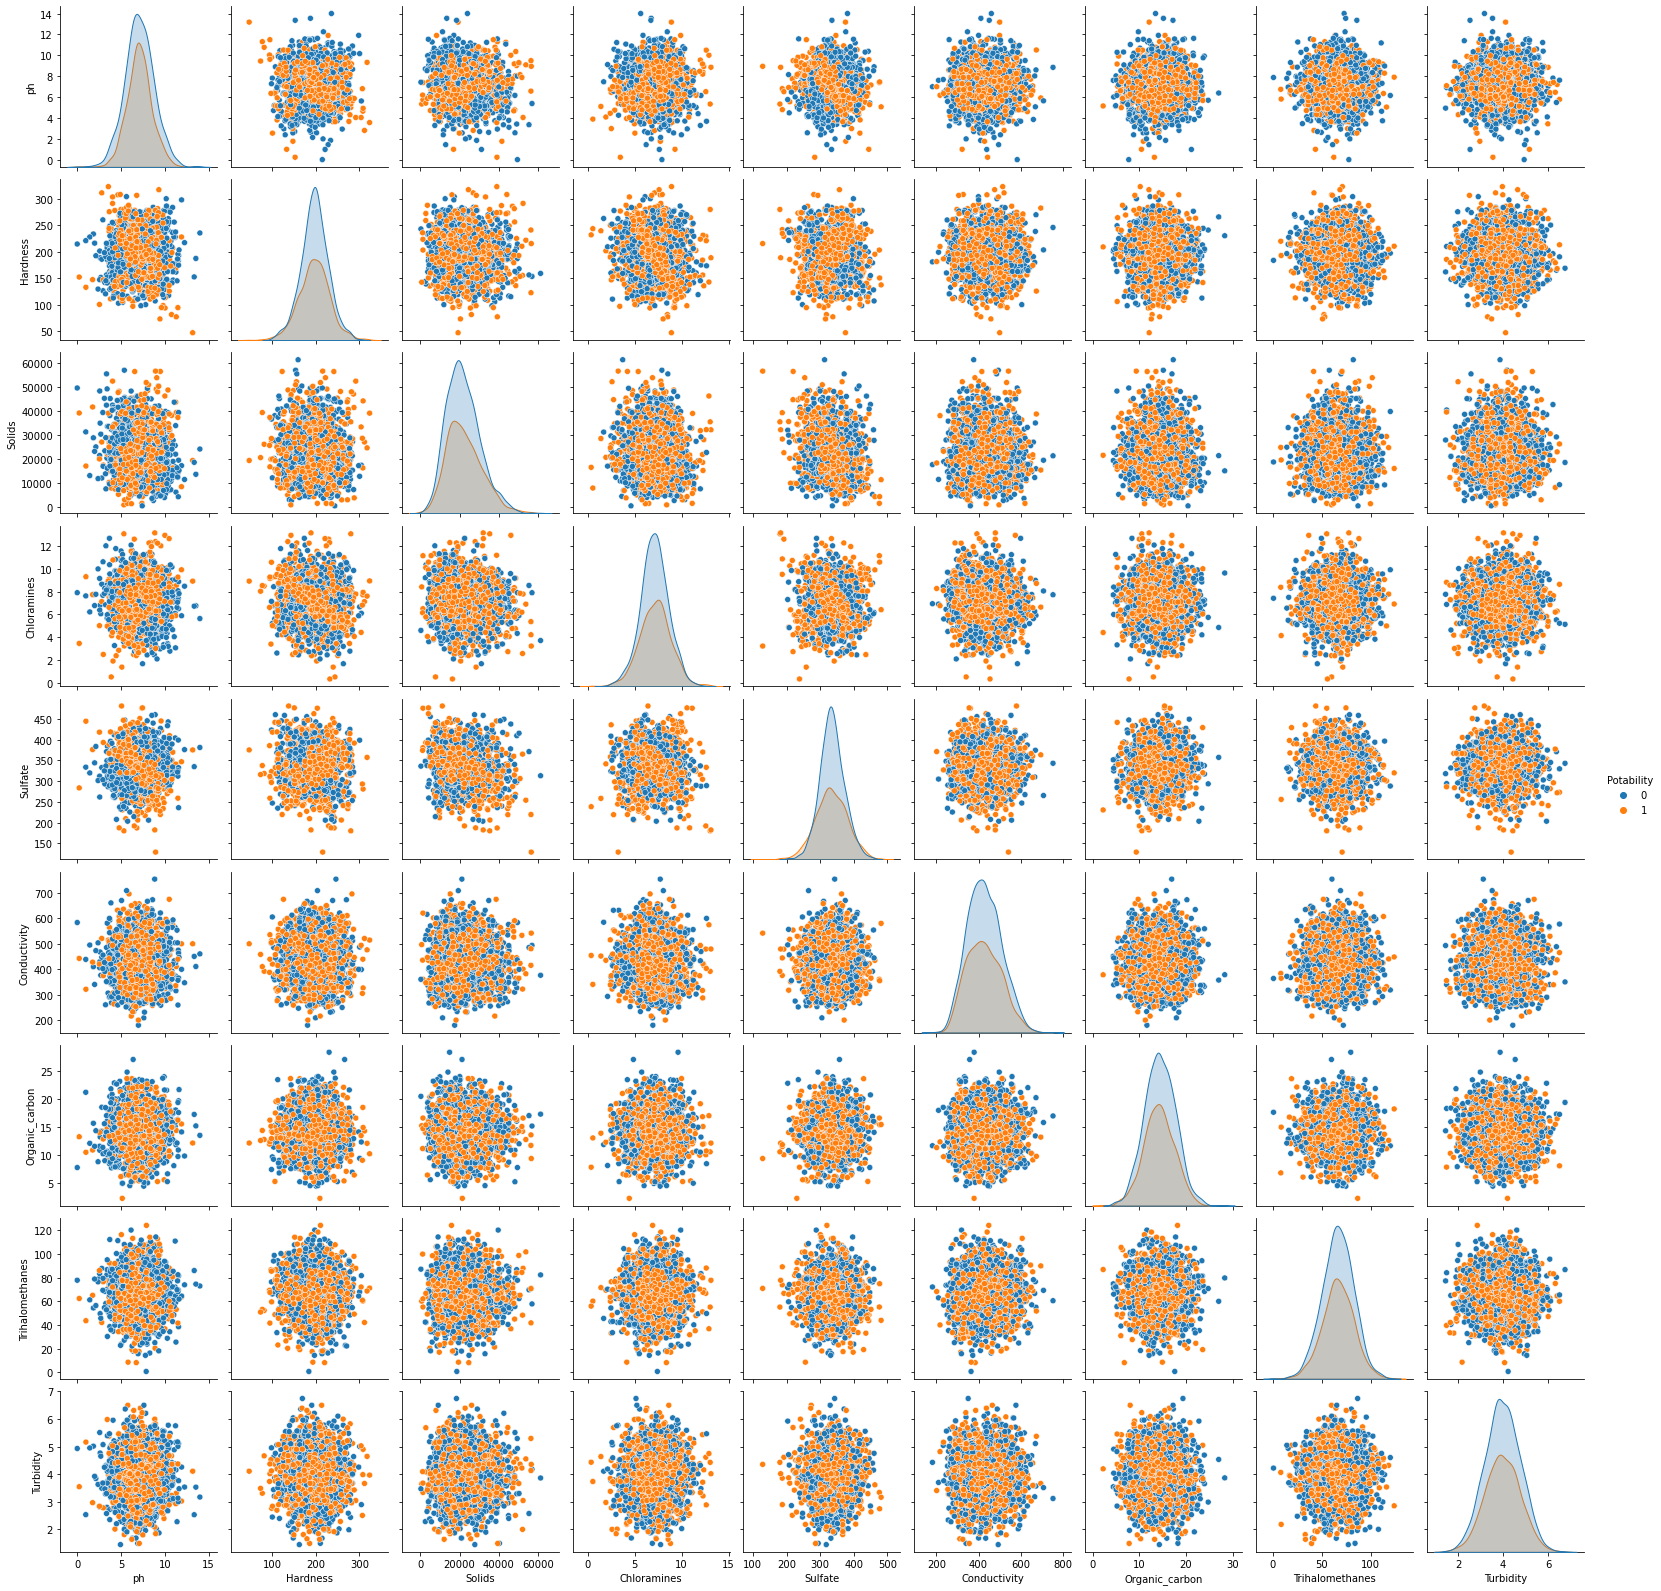

In [10]:
# plot each variable against each other to detect collinearity

# all combined
#sns.pairplot(water_data)

# colored by potability
sns.pairplot(water_data, hue='Potability');

## Calculate correlations between variables

In [11]:
# create a dataframe
potable_data = water_data[water_data["Potability"]==1]
corr = potable_data.drop(columns='Potability').corr(method="pearson")

# could also plot the correlations
#sns.heatmap(corr)
#plt.title("correlation coefficients for potable water")

corr

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000 -0.060159  0.095483     0.199888 -0.243991   
Hardness        -0.060159  1.000000 -0.068292    -0.051833 -0.045312   
Solids           0.095483 -0.068292  1.000000    -0.123785 -0.364907   
Chloramines      0.199888 -0.051833 -0.123785     1.000000  0.070995   
Sulfate         -0.243991 -0.045312 -0.364907     0.070995  1.000000   
Conductivity     0.016021 -0.016373  0.041701    -0.023142 -0.051269   
Organic_carbon   0.023782 -0.000433 -0.006168    -0.024537  0.043368   
Trihalomethanes  0.015606  0.022812  0.013604     0.023918 -0.084557   
Turbidity       -0.004288  0.015485  0.022553    -0.019341 -0.022294   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.016021        0.023782         0.015606  -0.004288  
Hardness            -0.016373       -0.000433         0.022812   0.015485  
Solids               0.041701       -0.006168         0.013604   0.022553  
Chloramines         -0.023142       -0.024537         0.023918  -0.019341  
Sulfate             -0.051269        0.043368        -0.084557  -0.022294  
Conductivity         1.000000        0.038385         0.031724  -0.027973  
Organic_carbon       0.038385        1.000000        -0.017385  -0.022959  
Trihalomethanes      0.031724       -0.017385         1.000000  -0.030281  
Turbidity           -0.027973       -0.022959        -0.030281   1.000000

In [12]:
print('Greatest correlation coefficients for potable water')
print('sulfate and solids:', round(corr['Sulfate'].loc['Solids'],3))
print('sulfate and pH:', round(corr['Sulfate'].loc['ph'],3))
print('chloramines and pH:', round(corr['Chloramines'].loc['ph'],3))

Greatest correlation coefficients for potable water
sulfate and solids: -0.365
sulfate and pH: -0.244
chloramines and pH: 0.2


In [13]:
# create dataframe
not_pot_data = water_data[water_data["Potability"]==0]
corr2 = not_pot_data.drop(columns='Potability').corr(method="pearson")

# could plot correlations using seaborn
#sns.heatmap(corr2)
#plt.title("correlation coefficients for unpotable water")

corr2

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.175009 -0.201389    -0.184245  0.218050   
Hardness         0.175009  1.000000 -0.029496    -0.011389 -0.168985   
Solids          -0.201389 -0.029496  1.000000    -0.030284 -0.000507   
Chloramines     -0.184245 -0.011389 -0.030284     1.000000 -0.015008   
Sulfate          0.218050 -0.168985 -0.000507    -0.015008  1.000000   
Conductivity     0.020174 -0.029837 -0.005145    -0.018230  0.013151   
Organic_carbon   0.054375  0.005813  0.022908    -0.003064  0.020363   
Trihalomethanes -0.003470 -0.039333 -0.025480     0.011671  0.017486   
Turbidity       -0.058855 -0.036393  0.017441     0.018065 -0.001669   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.020174        0.054375        -0.003470  -0.058855  
Hardness            -0.029837        0.005813        -0.039333  -0.036393  
Solids              -0.005145        0.022908        -0.025480   0.017441  
Chloramines         -0.018230       -0.003064         0.011671   0.018065  
Sulfate              0.013151        0.020363         0.017486  -0.001669  
Conductivity         1.000000        0.009416        -0.019321   0.027972  
Organic_carbon       0.009416        1.000000        -0.010254  -0.029978  
Trihalomethanes     -0.019321       -0.010254         1.000000  -0.016808  
Turbidity            0.027972       -0.029978        -0.016808   1.000000

In [14]:
print('Greatest correlation coefficients for nonpotable water')
print('sulfate and pH:', round(corr2["Sulfate"].loc["ph"],3))
print('solids and pH:', round(corr2["Solids"].loc["ph"],3))
print('chloramines and pH:', round(corr2["Chloramines"].loc["ph"],3))
print('hardness and pH:', round(corr2["Hardness"].loc["ph"],3))
print('hardness and sulfate:', round(corr2["Hardness"].loc["Sulfate"],3))

Greatest correlation coefficients for nonpotable water
sulfate and pH: 0.218
solids and pH: -0.201
chloramines and pH: -0.184
hardness and pH: 0.175
hardness and sulfate: -0.169


### Assessment of collinearity
The most highly correlated variables are sulfate in solids (r=-0.365) for potable water <br>
These correlation between these variables are less strong and in the opposite direction for non-potable water (r=0.175) <br>
Because of this, I decide not to remove either of these variables, <br>
by this observation may be a clue to a predictor of potability

# Data cleaning and feature engineering
- See demo notebooks and repeat. above might go here
- there are no categorical variables to convert to dummies in this dataset

## Calculate skew

In [15]:
# take only the float type columns
mask = water_data.dtypes == np.float
float_cols = water_data.columns[mask]

skew_vals = water_data[float_cols].skew()
skew_vals

C:\Users\kelly.mcgarry\AppData\Local\Temp\ipykernel_2148\887925299.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = water_data.dtypes == np.float


ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

### No skew above the limit of 0.75
I will try taking the logarithm of Solids, which has the greatest skew <br>
to see whether the resulting distribution is less skewed

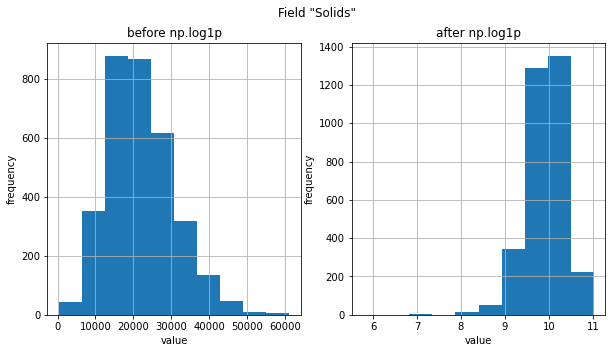

In [16]:
# field with the greatest skew
field = "Solids"

# Create two subplots and a figure using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
water_data[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
water_data[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

### log of Solids is skewed in the opposite direction
So I decide not to log transform the variable

## Deal with missing values

In [17]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


there are many null values in pH and sulfate, some in trihalomethanes <br> 
I will remove the observations (full row) with missing data <br>
the trade-off is that we have a smaller data set, <br>
but benefit is that we will not bias the data by filling with some value (0 or mean)

In [18]:
# remove the rows where there is any null value
# save the original copy
water_data2 = water_data[
    water_data['ph'].notnull() & water_data['Sulfate'].notnull() & water_data['Trihalomethanes'].notnull()]
water_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


### Now all of our observations are complete

### X are the features, Y is the target

In [19]:
X = water_data2.loc[:,['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
                      'Conductivity', 'Organic_carbon', 'Trihalomethanes', 
                      'Turbidity']]

y = water_data2['Potability']

## Add interaction terms

In [28]:
# maybe the effect of pH on potability depends on the concentration of chloramines
# create an interaction term that could express this

X3 = X.copy()
X3['sulfate_x_solids'] = X3['Sulfate'] * X3['Solids']

X3


ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
3       363.266516       18.436524       100.341674   4.628771   
4       398.410813       11.558279        31.997993   4.075075   
5       280.467916        8.399735        54.917862   2.559708   
6       283.651634       13.789695        84.603556   2.672989   
7       474.607645       12.363817        62.798309   4.401425   
...            ...             ...              ...        ...   
3267    390.410231        9.899115        55.069304   4.613843   
3268    329.266002       16.217303        28.878601   3.442983   
3269    439.893618       16.172755        41.558501   4.369264   
3270    415.886955       12.067620        60.419921   3.669712   
3271    526.424171       13.894419        66.687695   4.435821   

      sulfate_x_solids  
3         7.858068e+06  
4         5.575926e+06  
5         9.391574e+06  
6         1.131771e+07  
7         4.146879e+06  
...                ...  
3267      4.982304e+06  
3268      5.251864e+06  
3269      9.629325e+06  
3270      9.036183e+06  
3271      1.712671e+07  

[2011 rows x 10 columns]

In [29]:
# use scikit learn to consider all possible interactions
X4 = X.copy()
features = X4.columns

pf = PolynomialFeatures(degree=2)
pf.fit(X4[features])
feat_array = pf.transform(X4[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

C:\Users\kelly.mcgarry\Anaconda3\envs\ML_course\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1         ph    Hardness        Solids  Chloramines     Sulfate  \
0     1.0   8.316766  214.373394  22018.417441     8.059332  356.886136   
1     1.0   9.092223  181.101509  17978.986339     6.546600  310.135738   
2     1.0   5.584087  188.313324  28748.687739     7.544869  326.678363   
3     1.0  10.223862  248.071735  28749.716544     7.513408  393.663396   
4     1.0   8.635849  203.361523  13672.091764     4.563009  303.309771   
...   ...        ...         ...           ...          ...         ...   
2006  1.0   8.989900  215.047358  15921.412018     6.297312  312.931022   
2007  1.0   6.702547  207.321086  17246.920347     7.708117  304.510230   
2008  1.0  11.491011   94.812545  37188.826022     9.263166  258.930600   
2009  1.0   6.069616  186.659040  26138.780191     7.747547  345.700257   
2010  1.0   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  ...  \
0       363.266516       18.436524       100.341674   4.628771  ...   
1       398.410813       11.558279        31.997993   4.075075  ...   
2       280.467916        8.399735        54.917862   2.559708  ...   
3       283.651634       13.789695        84.603556   2.672989  ...   
4       474.607645       12.363817        62.798309   4.401425  ...   
...            ...             ...              ...        ...  ...   
2006    390.410231        9.899115        55.069304   4.613843  ...   
2007    329.266002       16.217303        28.878601   3.442983  ...   
2008    439.893618       16.172755        41.558501   4.369264  ...   
2009    415.886955       12.067620        60.419921   3.669712  ...   
2010    526.424171       13.894419        66.687695   4.435821  ...   

      Conductivity^2  Conductivity Organic_carbon  \
0      131962.561766                  6697.372024   
1      158731.176220                  4604.943514   
2       78662.251868                  2355.856069   
3       80458.249192                  3911.469602   
4      225252.416638                  5867.961926   
...              ...                          ...   
2006   152420.148183                  3864.715923   
2007   108416.099915                  5339.806501   
2008   193506.395084                  7114.291904   
2009   172961.958937                  5018.765549   
2010   277122.407731                  7314.357749   

      Conductivity Trihalomethanes  Conductivity Turbidity  Organic_carbon^2  \
0                     36450.770473             1681.477347        339.905435   
1                     12748.346309             1623.554115        133.593824   
2                     15402.698258              717.916032         70.555542   
3                     23997.936909              758.197622        190.155697   
4                     29804.557523             2088.949819        152.863963   
...                            ...                     ...               ...   
2006                  21499.619647             1801.291450         97.992486   
2007                   9508.741600             1133.657258        263.000915   
2008                  18281.319236             1922.011487        261.558019   
2009                  25127.856972             1526.185224        145.627442   
2010                  35106.014438             2335.123345        193.054866   

      Organic_carbon Trihalomethanes  Organic_carbon Turbidity  \
0                        1849.951737                 85.338441   
1                         369.841742                 47.100861   
2                         461.295466                 21.500870   
3                        1166.657262                 36.859700   
4                         776.426781                 54.418408   
...                              ...                       ...   
2006                      545.137394                 45.672963   
2007                      468.333027                 55.835899   
2008                      672.115469                 70.663043

## Create deviation data set

In [30]:
X5 = X4.copy()

for feature in X4.columns:
    #print(feature)
    feat_mean = X4[feature].mean()
    #print(feat_mean)
    feat_std = X4[feature].std()
    #print(feat_std)
    
    X5[feature]=(X4[feature]-feat_mean)/feat_std

X5


ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
3     0.782271  0.563973  0.011684     0.583659  0.574235     -0.783768   
4     1.275146 -0.455539 -0.455722    -0.370855 -0.560341     -0.348342   
5    -0.954597 -0.234556  0.790449     0.259039 -0.158871     -1.809613   
6     1.994406  1.596554  0.790568     0.239188  1.466775     -1.770168   
7     0.985078  0.226549 -0.954076    -1.622474 -0.725999      0.595709   
...        ...       ...       ...          ...       ...           ...   
3267  1.210110  0.584625 -0.693805    -0.528153 -0.492503     -0.447467   
3268 -0.243713  0.347878 -0.540429     0.362047 -0.696865     -1.205022   
3269  2.799796 -3.099594  1.767063     1.343262 -1.803028      0.165615   
3270 -0.645999 -0.285246  0.488454     0.386927  0.302767     -0.131819   
3271 -1.536790 -0.070058  2.969548     0.020381  0.648557      1.237698   

      Organic_carbon  Trihalomethanes  Turbidity  
3           1.226727         2.111127   0.844550  
4          -0.841944        -2.139866   0.135000  
5          -1.791894        -0.714245  -1.806917  
6          -0.170833         1.132212  -1.661750  
7          -0.599674        -0.224079   0.553211  
...              ...              ...        ...  
3267       -1.340947        -0.704825   0.825421  
3268        0.559283        -2.333893  -0.675016  
3269        0.545885        -1.545201   0.511998  
3270       -0.688757        -0.372016  -0.384467  
3271       -0.139337         0.017841   0.597289  

[2011 rows x 9 columns]

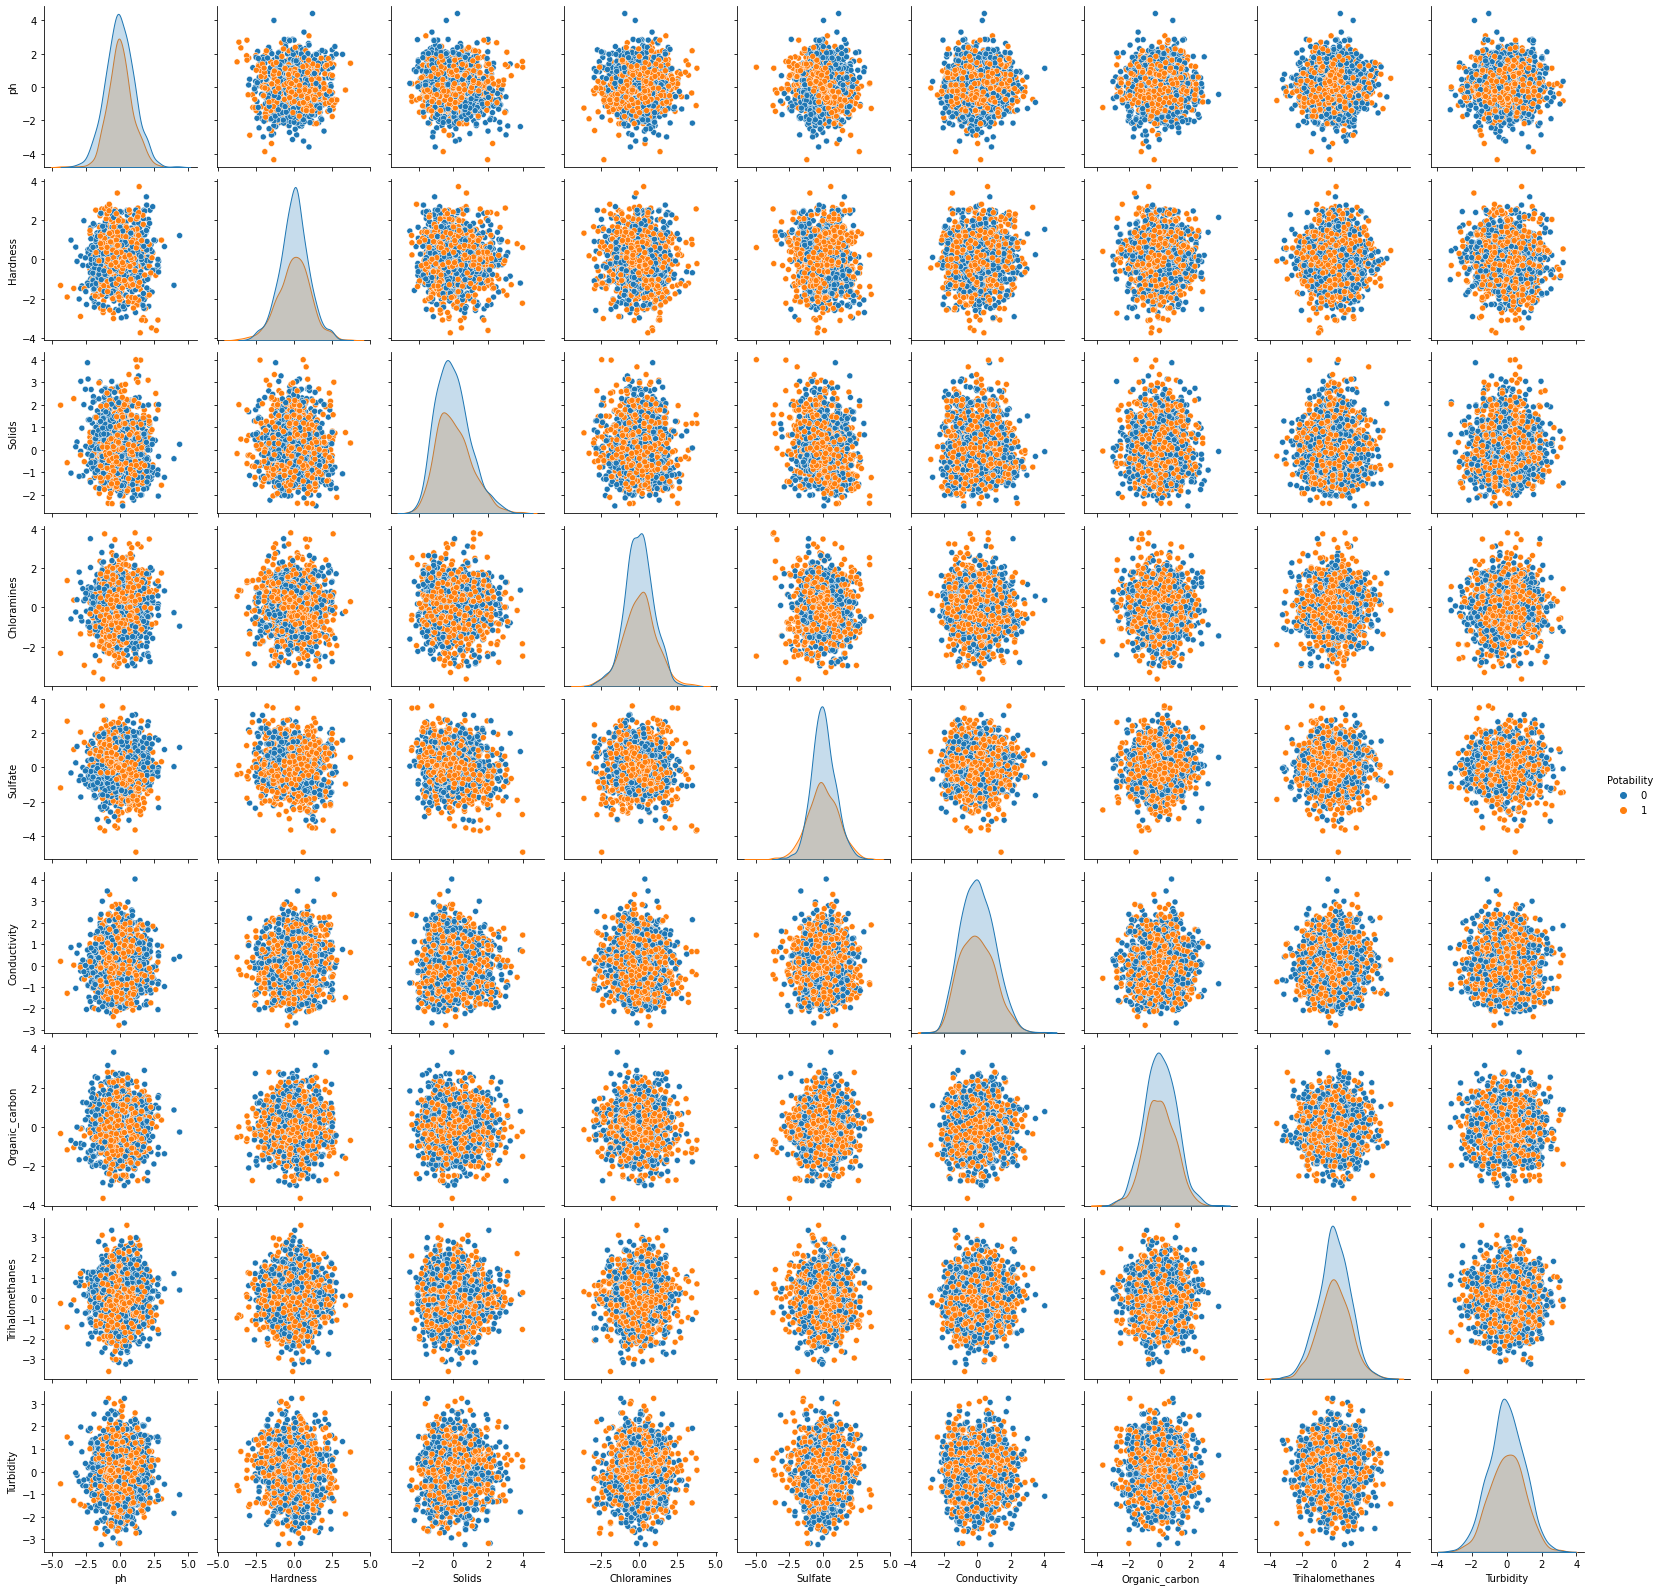

In [31]:
### re-plot correlations and distributions of deviation features
X5['Potability'] = water_data2['Potability']

sns.pairplot(X5, hue='Potability');

In [39]:
# calculate mean and median of each variable, separated by potability
comparedf=X5.groupby('Potability').agg(['mean', 'median'])
comparedf

ph            Hardness              Solids            \
                mean    median      mean    median      mean    median   
Potability                                                               
0          -0.011942 -0.059736  0.001237  0.025472 -0.033430 -0.163157   
1           0.017670 -0.025069 -0.001830  0.050541  0.049464 -0.081030   

           Chloramines             Sulfate           Conductivity            \
                  mean    median      mean    median         mean    median   
Potability                                                                    
0            -0.017082 -0.019321  0.012577 -0.014781     0.012736 -0.025361   
1             0.025275  0.049164 -0.018610 -0.051874    -0.018844 -0.067232   

           Organic_carbon           Trihalomethanes           Turbidity  \
                     mean    median            mean    median      mean   
Potability                                                                
0                0.012794 -0.001769       -0.007598 -0.012113 -0.018642   
1               -0.018931 -0.031587        0.011242  0.013194  0.027584   

                      
              median  
Potability            
0          -0.032862  
1           0.048208

### Key Findings and Insights
synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

* All of the features are float type, there is no categorical data, so it is not necessary to create dummy variables
* None of the features has a skew greater than .75, so taking the log transform is not useful. It only creates a skew in the opposite direction.
* None of the features are strongly correlated with each other when the full data set is considered, so there is no danger of collinearity
* There are a large number of null values in pH and sulfate data. To avoid introducing a bias, remove the observations containing null values. There is a trade-off that now we have a smaller dataset. It is also an option to fill in the mean or median.  

### At least 3 hypotheses about this data

* Sulfate and solids are negatively correlated (r=-0.365) in the potable subset, but not correlated in the non-potable subset. The relationship between these two may be useful for predicting potability.
* Mean and median turbity are quite different when split by Potability, so this may be a useful variable for predicting Potability

### Conduct a formal significance test for one of the hypotheses and discuss the results 

[point biserial correlation coefficient](https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient) for turbity and potability

In [57]:
sn = X5.Turbidity.std()

M1 = X5[X5.Potability==1].Turbidity.mean()
n1 = len(X5[X5.Potability==1])

M0 = X5[X5.Potability==0].Turbidity.mean()
n0 = len(X5[X5.Potability==0])

rpb = ((M1-M0)/sn)*np.sqrt((n1*n0)/(n1+n0)**2)
rpb

0.022676756130771445

### Suggestions for next steps in analyzing this data

Build a model using all of the variables to predict potability

### A paragraph that summarizes the quality of this data set and a request for additional data if needed

This data set is good quality